# Heart Disease Prediction

In [ ]:
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Importing dataset**

In [ ]:
data = pd.read_csv('heart.csv')

**Printing out a few columns**

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**The features list**
*   **age**: The person's age
*   **sex**: The person's sex (1=male, 0=female)
*   **cp**: The chest pain expereince (0=typical angina, 1=atypical angina, 2=non-anginal pain, 4=asymptomatic
*   **trestbps**: The person's resting blood pressure in mmHg
*   **chol**: The person's cholesterol measurement in mg/di
*   **fbs**: The person's fasting blood sugar (>120mg/di, 1=true, 0=false)
*   **restecg**: Resting electrocardiographic measurement(0=normal, 1=having ST-T wave abnormality, 2=showing probable or definite left ventricular hypertrophy by Estes' criteria
*   **thalach**: The person's maximum heart rate archieved
*   **exang**: Exercise induced angina(1=yes, 0=no)
*   **oldspeak**: ST depression induced by exercise relative to rest('ST' relates to positions on the ECG plot)
*   **slope**: The slope of the peak exercise ST segment(1=upsloping, 2=flat, 0=downsloping)
*   **ca**: The number of major vessels(0-3)
*   **thal**: A blood disorder called thalassemia(3=normal, 6=fixed defect, 7=reversabl
*   **target**: Heart diseasem(1=yes, 0=no)











**Shape of dataset**

In [ ]:
data.shape

(1025, 14)

**Description**

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


no missing value

###Visualize the data

**Show the relationship graph**

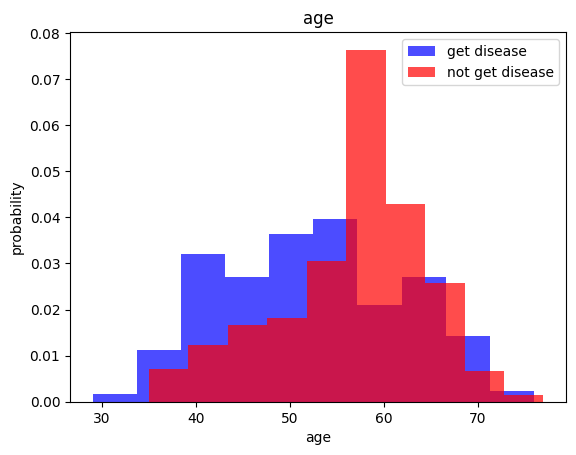

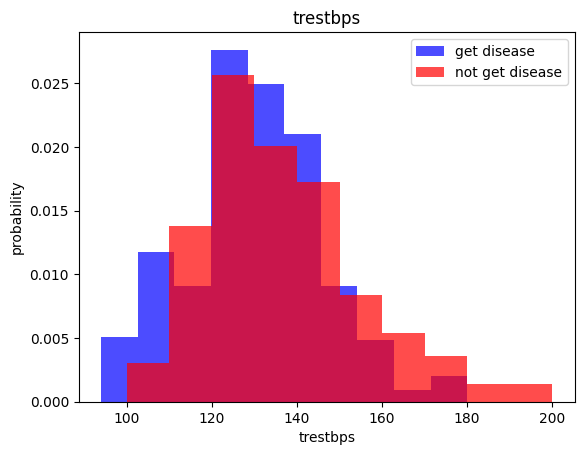

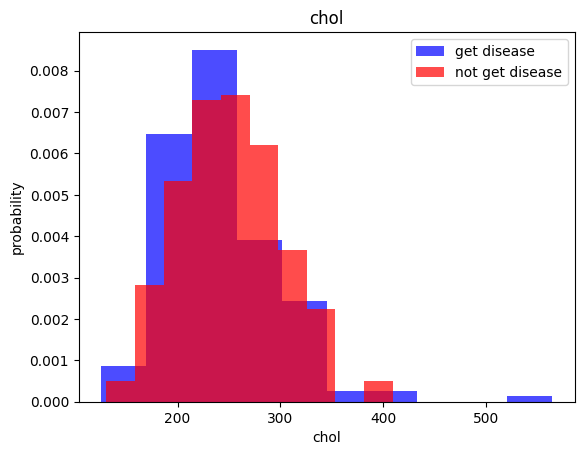

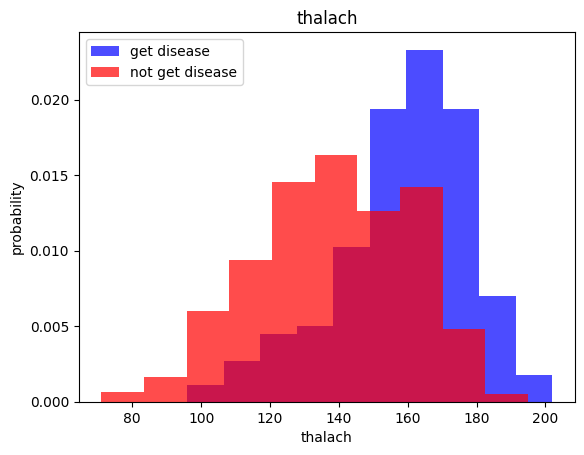

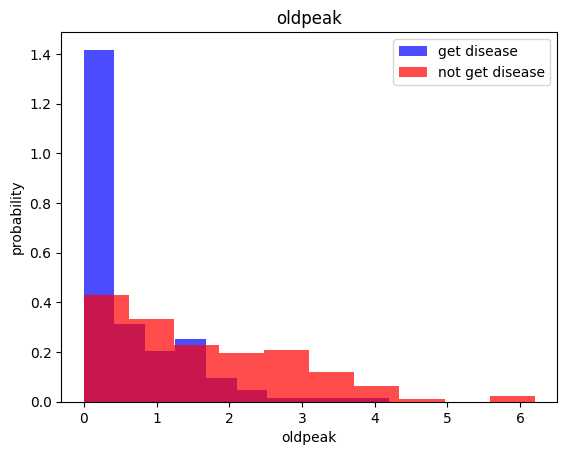

In [ ]:
features_to_plot = ["age", "trestbps", "chol","thalach","oldpeak"]
for label in features_to_plot:
    plt.hist(data[data["target"]==1][label], color='blue', label='get disease', alpha=0.7, density=True)
    plt.hist(data[data["target"]==0][label], color='red', label='not get disease', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

**Create the visualize report**

In [ ]:
!pip install -U ydata-profiling[notebook]==4.0.0 matplotlib==3.5.1
from collections import Counter
import ydata_profiling as pp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]